In [1]:
file=r'../Data/insurance.csv'

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from mypipes import *

In [5]:
in_train=pd.read_csv(file)

In [6]:
in_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
cat_vars=['sex','region','smoker']
num_vars=['age','bmi','children']

In [8]:
p1=pdPipeline([
    ('cat_select',VarSelector(cat_vars)),
    ('missing_trt',DataFrameImputer()),
    ('create_dummies',get_dummies_Pipe(15))
])

p2=pdPipeline([
    ('num_select',VarSelector(num_vars)),
    ('missing_trt',DataFrameImputer())
])

data_pipe=FeatureUnion([
    ('cat_pipe',p1),
    ('num_pipe',p2)
])

In [9]:
x_train=pd.DataFrame(data=data_pipe.fit_transform(in_train),
                     columns=data_pipe.get_feature_names())

C:\Users\Jayanti\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
y_train=in_train['charges']

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

In [12]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

## Decision Trees

In [13]:
params={ 
        'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]
       }

In [14]:
reg=DecisionTreeRegressor()

In [15]:
random_search=RandomizedSearchCV(reg,
                                 cv=10,
                                 param_distributions=params,
                                 scoring='neg_mean_absolute_error',
                                 n_iter=10,n_jobs=-1,verbose=20
                                    )

In [16]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20, 30,
                                                      50, 70],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              20]},
                   scoring='neg_mean_absolute_error', verbose=20)

In [17]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -2645.30744 (std: 269.05048)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5}

Model with rank: 2
Mean validation score: -2674.02743 (std: 310.73332)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 15, 'max_depth': None}

Model with rank: 2
Mean validation score: -2674.02743 (std: 310.73332)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 15, 'max_depth': 30}

Model with rank: 4
Mean validation score: -2680.16083 (std: 295.29210)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': 15}

Model with rank: 5
Mean validation score: -2719.25483 (std: 334.56641)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 10}



## Random Forest


In [18]:
param_dist = {"n_estimators":[50,100,200],
              "max_features": [2,4,5,6,8],
              "bootstrap": [True, False],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [19]:
reg=RandomForestRegressor()

In [20]:
n_iter_search = 10
random_search=RandomizedSearchCV(reg,
                                 cv=10,
                                 param_distributions=param_dist,
                                 scoring='neg_mean_absolute_error',
                                 n_iter=10,n_jobs=-1,verbose=20
                                    )

random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20, 30,
                                                      50, 70],
                                        'max_features': [2, 4, 5, 6, 8],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [50, 100, 200]},
                   scoring='neg_mean_absolute_error', verbose=20)

In [21]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -2514.22307 (std: 290.83487)
Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 15, 'max_features': 8, 'max_depth': 50, 'bootstrap': True}

Model with rank: 2
Mean validation score: -2544.46235 (std: 254.35457)
Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 5, 'max_depth': 20, 'bootstrap': False}

Model with rank: 3
Mean validation score: -2566.66426 (std: 295.60265)
Parameters: {'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 20, 'max_features': 8, 'max_depth': 50, 'bootstrap': True}

Model with rank: 4
Mean validation score: -2584.67085 (std: 249.31217)
Parameters: {'n_estimators': 50, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 20, 'bootstrap': False}

Model with rank: 5
Mean validation score: -2627.09555 (std: 216.32560)
Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_feature

## Extra Trees

In [22]:
param_dist = {"n_estimators":[50,100,200],
              "max_features": [2,4,5,6,8],
              "bootstrap": [True, False],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [23]:
reg=ExtraTreesRegressor()

In [24]:
n_iter_search = 10
random_search=RandomizedSearchCV(reg,
                                 cv=10,
                                 param_distributions=param_dist,
                                 scoring='neg_mean_absolute_error',
                                 n_iter=10,n_jobs=-1,verbose=20
                                    )

random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=ExtraTreesRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20, 30,
                                                      50, 70],
                                        'max_features': [2, 4, 5, 6, 8],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [50, 100, 200]},
                   scoring='neg_mean_absolute_error', verbose=20)

In [25]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -2530.07921 (std: 206.24210)
Parameters: {'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 8, 'max_depth': 70, 'bootstrap': False}

Model with rank: 2
Mean validation score: -2685.37016 (std: 203.86514)
Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 6, 'max_depth': 20, 'bootstrap': False}

Model with rank: 3
Mean validation score: -2794.83768 (std: 228.79272)
Parameters: {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 6, 'max_depth': 20, 'bootstrap': True}

Model with rank: 4
Mean validation score: -3126.79965 (std: 248.08822)
Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_features': 6, 'max_depth': 10, 'bootstrap': False}

Model with rank: 5
Mean validation score: -3265.43443 (std: 267.37645)
Parameters: {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 20, 'max_fea

## Feature Importance for extratrees 
#### can be doen for other algos the same as well

In [26]:
et=random_search.best_estimator_
et.fit(x_train,y_train)

ExtraTreesRegressor(max_depth=70, max_features=8, min_samples_leaf=2,
                    min_samples_split=20, n_estimators=50)

In [27]:
feat_imp_df=pd.DataFrame({'features':x_train.columns,'importance':et.feature_importances_})

feat_imp_df.sort_values('importance',ascending=False)

,features,importance
4,cat_pipe__smoker_no,0.705604
6,num_pipe__bmi,0.158366
5,num_pipe__age,0.116047
7,num_pipe__children,0.009684
2,cat_pipe__region_southwest,0.002788
3,cat_pipe__region_northwest,0.002682
0,cat_pipe__sex_male,0.002444
1,cat_pipe__region_southeast,0.002386


## Partial Dependence Plot for Extratrees



In [28]:
%matplotlib inline

In [29]:
var_name='num_pipe__bmi'

preds=et.predict(x_train)


In [30]:
var_data=pd.DataFrame({'var':x_train[var_name],'response':preds})

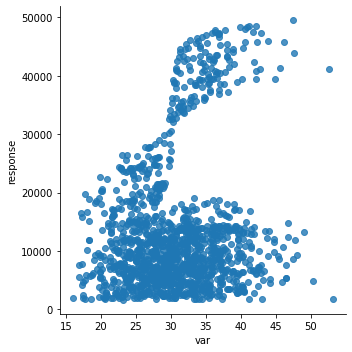

In [31]:
import seaborn as sns

sns.lmplot(x='var',y='response',data=var_data,fit_reg=False)

In [32]:
import statsmodels.api as sm
smooth_data=sm.nonparametric.lowess(var_data['response'],var_data['var'])

# smooth_data

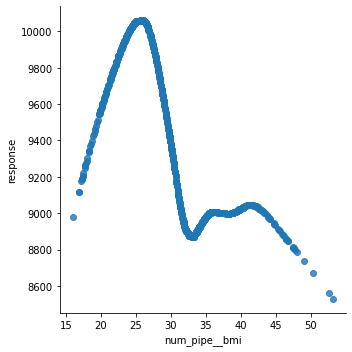

In [33]:
df=pd.DataFrame({'response':smooth_data[:,1],var_name:smooth_data[:,0]})

sns.lmplot(x=var_name,y='response',data=df,fit_reg=False)